# The Task

**Scenario**
- Fraud detection at self-checkouts in retail
- Research has shown that discrepancies are found in approximately 5% of all self-scan transactions (see DMC task description)
- A small labeled training set is given

**Data**
- The training set was accompanied by a **data dictionary** that gives a description and the value range for each of the features. We will replicate it here to have it all in one place. 

Column name | Description | Value range
--- | --- | ---
**trustLevel** | A customer's individual trust level. 6: Highest trustworthiness | {1,2,3,4,5,6}
**totalScanTimeInSeconds** | Total time in seconds between the first and the last product scanned | Positive whole number
**grandTotal** | Grand total of products scanned | Positive decimal number with maximum two decimal places
**lineItemVoids** | Number of voided scans | Positive whole number
**scansWithoutRegistration** | Number of attempts to activate the scanner without actually scanning anything | Positive whole number or 0
**quantityModification** | Number of modified quantities for one of the **scanned products** | Positive whole number or 0
**scannedLineItemsPerSecond** | Average number of scanned products per second | Positive decimal number
**valuePerSecond** | Average total value of scanned products per second | Positive decimal number
**lineItemVoidsPerPosition** | Average number of item voids per total number of all scanned and not cancelled products | Positive decimal number
**fraud** | Classification as *fraud (1)* or *not fraud (0)* | {0,1}

**Task**
- Develop a model that reliably classifies scans as *fraudulent* or *not fraudulent*
- **Meaning**: binary classification on a highly unbalanced data set

**Evaluation**
- *The solutions submitted will be assessed and compared based on their monetary value for the food retailer. This can be calculated using the following cost matrix based on empirical observation.* (see DMC task description)


<table style="border-collapse:collapse;border-spacing:0" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top" rowspan="4"><br><br><br><br><br><span style="font-weight:bold">Prediction</span><br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top" colspan="3"><span style="font-weight:bold">Actual Value</span></th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:right;vertical-align:top"><span style="font-weight:bold">0 (no fraud)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;text-align:right;vertical-align:top"><span style="font-weight:bold">1 (fraud)</span></td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:left;vertical-align:top"><span style="font-weight:bold">0 (no fraud)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:right;vertical-align:top">0,00 €<br>(True Negative)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;text-align:right;vertical-align:top">- 5,00 €<br>(False Negative)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:left;vertical-align:top"><span style="font-weight:bold">1 (fraud)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:right;vertical-align:top">- 25,00 €<br>(False Positive)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;text-align:right;vertical-align:top">5,00 €<br>(True Positive)</td></tr></table>

**Goal**
- *The winning team is the one whose solution achieves the highest monetary profit. In the event of a tie, a random draw will determine the winner.* (see DMC task description)
- **Meaning:** Develop a model that maximizes the monetary profit which in this case means minimizing the false positives

**Plan**
* Step one: **Prepare the Data and start learning/researching**
* Step two: **Exploratory Data Analysis**
* Step three: **Build, train & evaluate models**
* Step four: **Optimize model / Hyperparameter tuning**
* **Reiterate Step two to four until satisfied**

## Findings

1. The training data set is fairly small and consists only of **1879 samples** for **9 features** and **1 label/target**
2. The data set is already cleansed and there are **no missing values** consequently it's unneccessary to look into workarounds for that 
3. The data set is highly imbalanced between the two classes *no fraud* (**1775 samples | 94%**) and *fraud* (**104 samples | 6%**) which means we will have to find a viable way to mitigate the **Class Imbalance Problem** for our specific assignment (**Sampling based approaches: e.g. over-/undersampling, SMOTE, etc.** or **Cost Function based approaches**) 
4. All features are numerical **but** they come in different flavors *trustLevel* contains basically categorical data or ordinal data. The individual range/distribution of the features is highly imbalanced / widespread which means we'll have to **standardize** / **normalize** the data
5. Feature Selection: 
    * *trustLevel*: We found that the customer's individual trust level is a strong predictor for the *fraud* / *no fraud*     outcome. A low level (1-2) of the customer's trust level correlates strongly to the outcome *fraud* as there were no       frauds for customers above trustLevel 2 detected. Consequently this feature **should be included** in the model.
    * *totalScanTimeinSeconds*: We didn't anything special, no outliers 
    * *grandTotal*: We didn't anything special, no outliers
    * *lineItemVoids*: We didn't anything special, no outliers
    * *scansWithoutRegistration*: We didn't anything special, no outliers
    * *quantityModification*: We didn't anything special, no outliers
    * *scannedLineItemsPerSecond*: has outliers which might be measurement errors
    * *valuePerSecond*: has outliers which highly correlate with scannedLineItemsPerSecond
    * *lineItemVoidsPerPosition*: has outliers

## Next Steps

### Data Preprocessing

* Standardization / Normalization
* Splitting Test / Train / Cross Validation
* Research Undersampling / Oversampling methods regarding imbalanced data sets

### Model Development, Evaluation & Optimization

- Find a good baseline model (basically one that classifies 97% of the random samples as *not fraud*)
- Build upon that with more complex models
- Research different evalutaion metrics which have a good fit for imbalanced data sets and our task (F1-score, Precision, Recall, Sensitivity, Specificity)

%%HTML
<img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="Machine Learning Map" height="100%" width="100%">

# Exploratory Data Analysis
## 1. Understanding the Problem

**Data Dictionary / Description of the features**


The training set was accompanied by a **data dictionary** that gives a description and the value range for each of the features. We will replicate it here to have it all in one place. 

Column name | Description | Value range
--- | --- | ---
**trustLevel** | A customer's individual trust level. 6: Highest trustworthiness | {1,2,3,4,5,6}
**totalScanTimeInSeconds** | Total time in seconds between the first and the last product scanned | Positive whole number
**grandTotal** | Grand total of products scanned | Positive decimal number with maximum two decimal places
**lineItemVoids** | Number of voided scans | Positive whole number
**scansWithoutRegistration** | Number of attempts to activate the scanner without actually scanning anything | Positive whole number or 0
**quantityModification** | Number of modified quantities for one of the **scanned products** | Positive whole number or 0
**scannedLineItemsPerSecond** | Average number of scanned products per second | Positive decimal number
**valuePerSecond** | Average total value of scanned products per second | Positive decimal number
**lineItemVoidsPerPosition** | Average number of item voids per total number of all scanned and not cancelled products | Positive decimal number
**fraud** | Classification as *fraud (1)* or *not fraud (0)* | {0,1}

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# get current directory 
path = os.getcwd() 

# get parent directory 
parent = os.path.dirname(path)

# move to the directory with data
train_csv = os.path.join(parent, "data", "train.csv")

#Import our dataset
dataset = pd.read_csv(train_csv, delimiter = '|')

In [3]:
# first glimpse of the data
dataset.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [9]:
# get datatypes of the features
dataset.info()
categorical_features = dataset.select_dtypes(exclude=['int', 'float']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


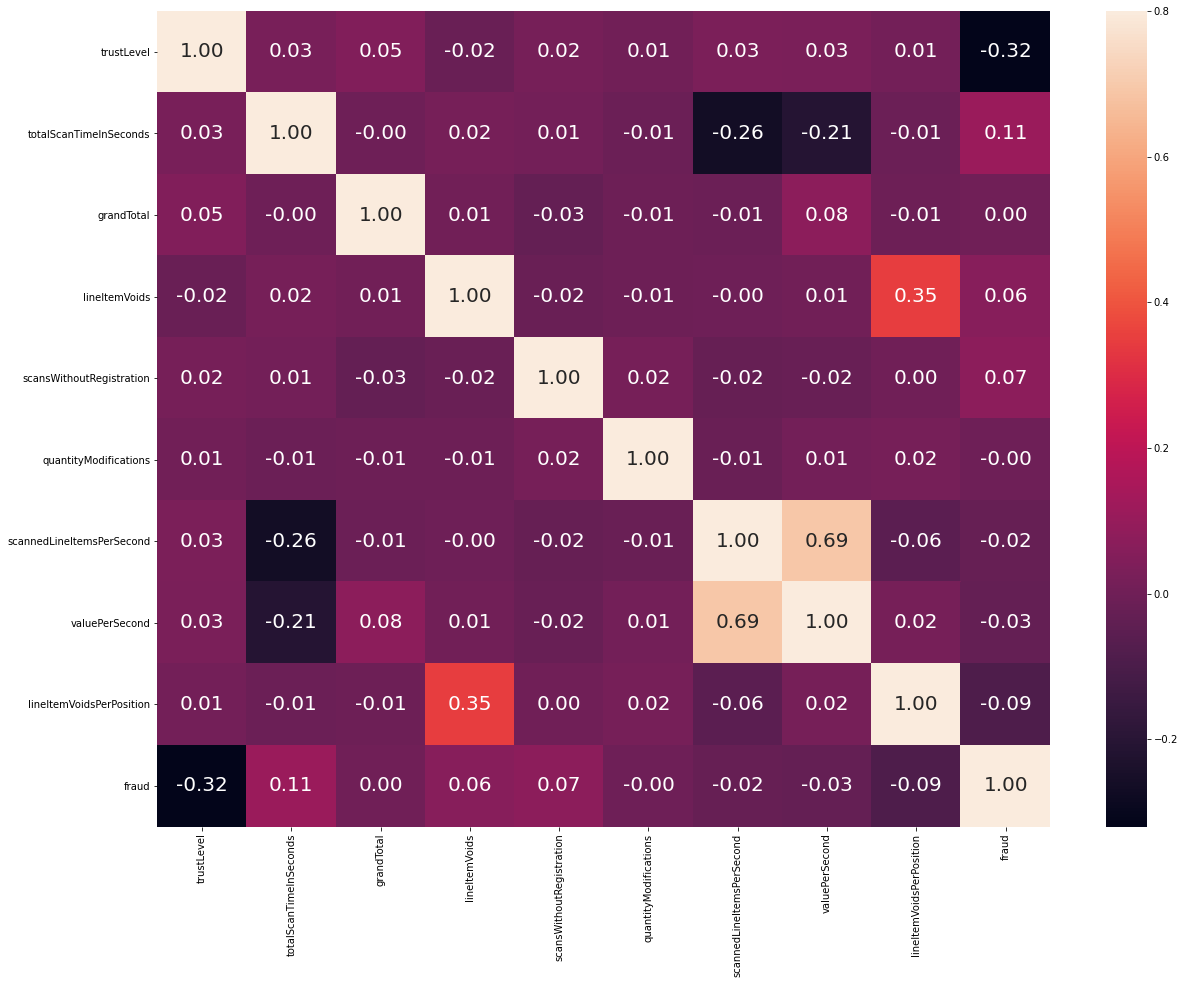

In [46]:
# look at the correlation btw. the featues
fig = plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(), annot=True,vmax=0.8, annot_kws={"size":20,"fontsize":20},fmt=".2f", )

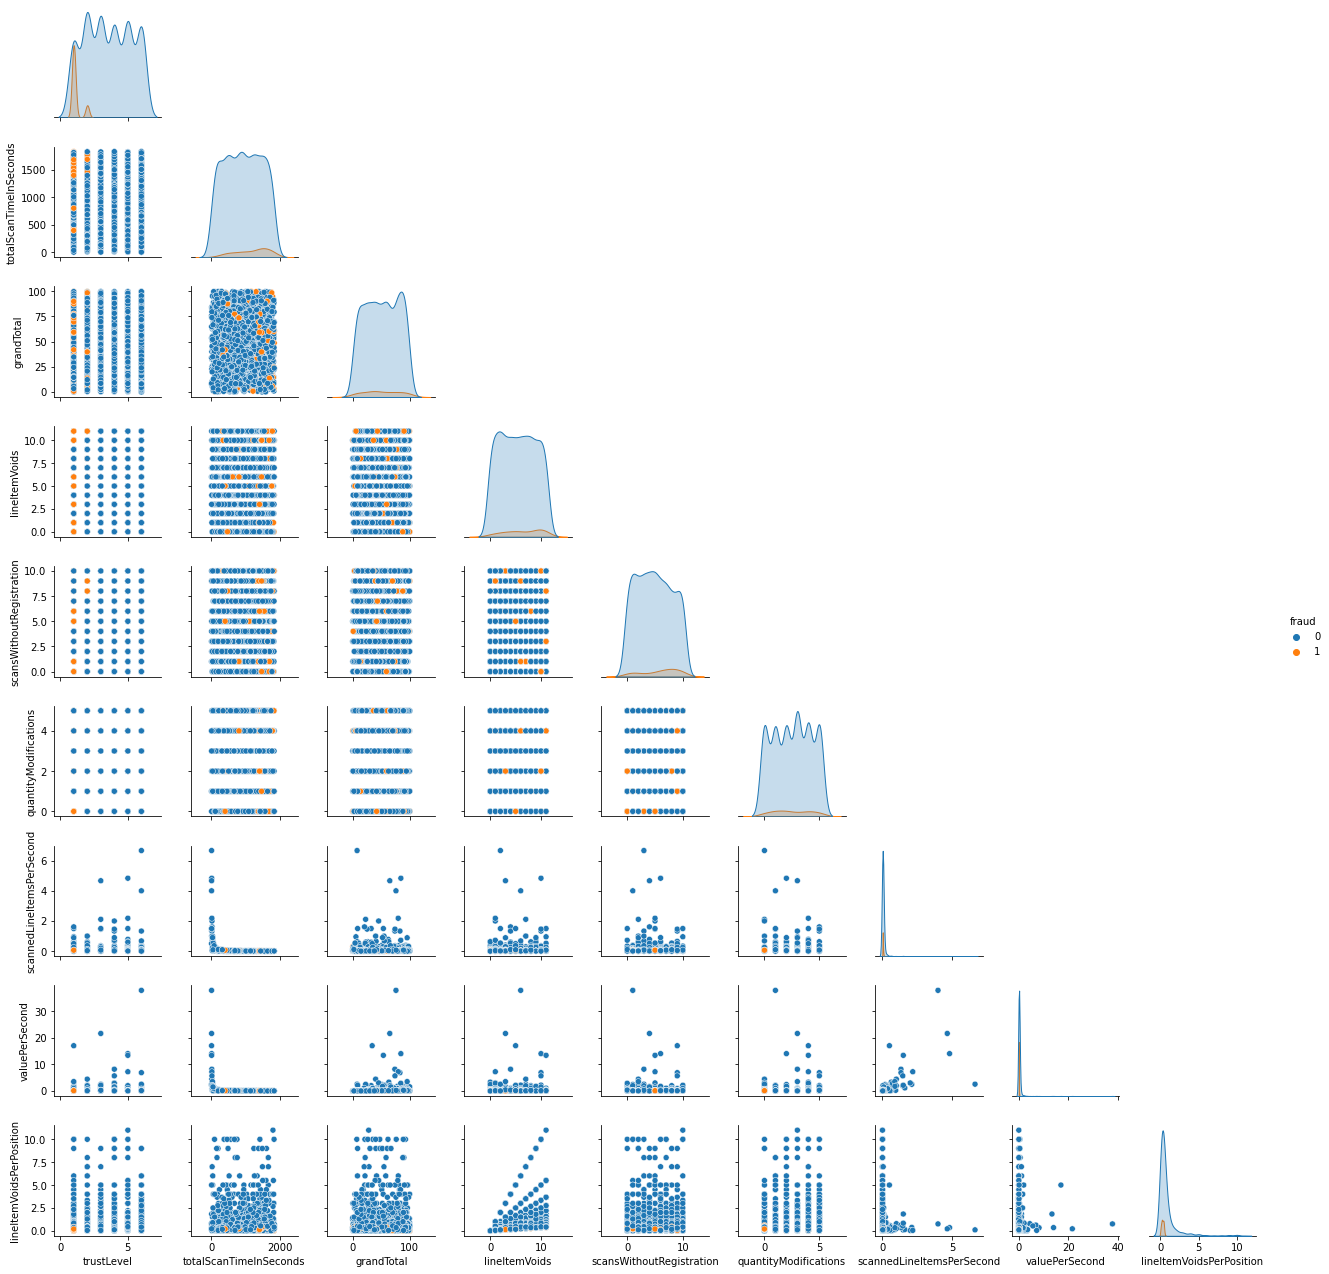

In [48]:
# see how frauds are distributed accross the features
## orange: fraud 
## blue: no-fraud
sns.pairplot(dataset, hue='fraud', corner=True, height=2)

In [10]:
# look in our categorical feature trustLevel
## see how the frauds are distributed accross the trustLevels
distribution_of_fraud_for_trustLevel = dataset.groupby(['trustLevel']).sum()
distribution_of_fraud_for_trustLevel['fraud']

trustLevel
1    89
2    15
3     0
4     0
5     0
6     0
Name: fraud, dtype: int64

## 2. Examine the data for outliers

There are numerous ways to identify outliers in a dataset e.g. calculating the **Z-Score** or the **IQR** (interquartile range). There is also a nice visualization - **boxplots** - which visualize the IQR. Let's have a look for every individual (univariate) feature:

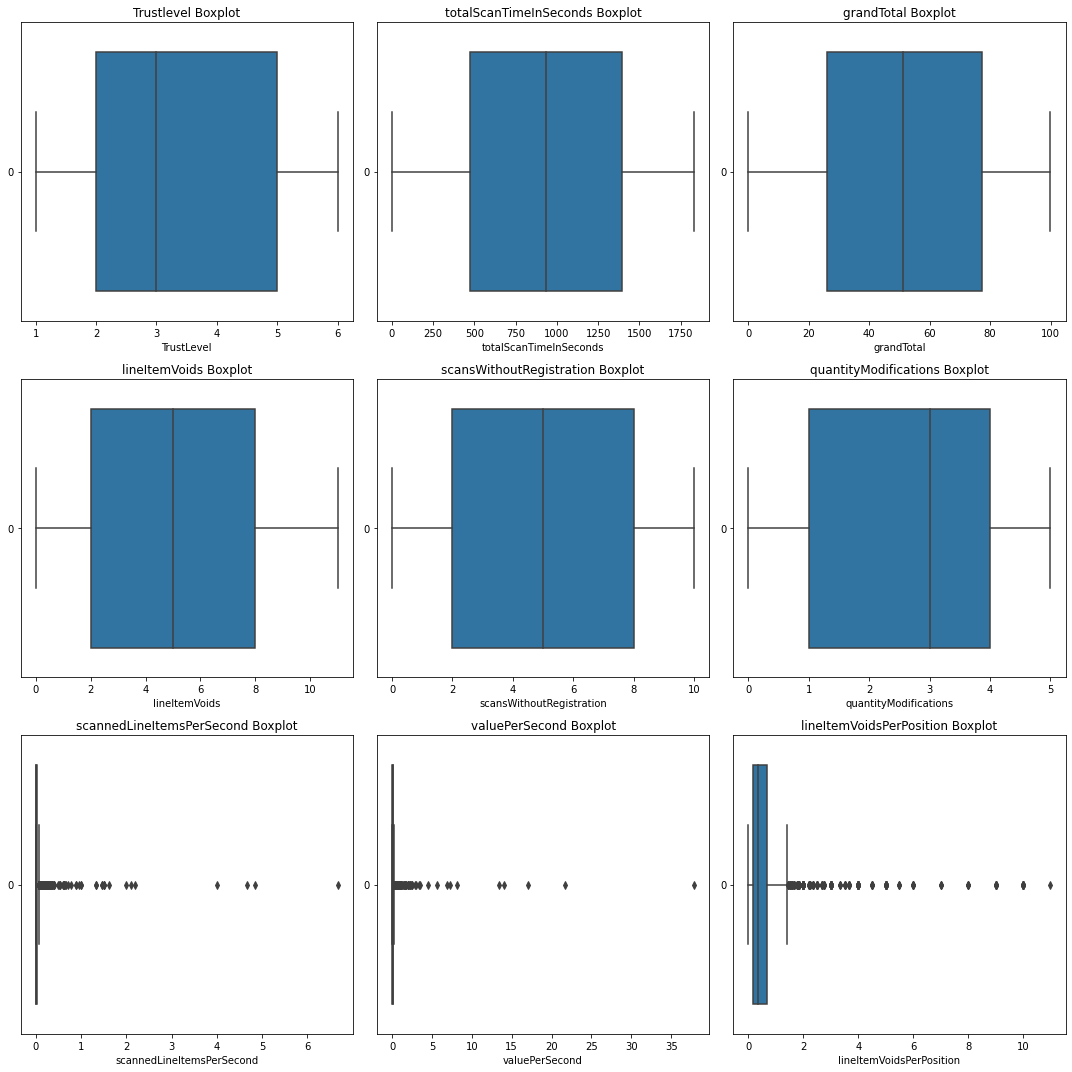

In [11]:
# sns.boxplot(data=df, orient="h")

fig_grid2 = plt.figure(figsize=(15,15))

# fig TrustLevel 
fax3 = fig_grid2.add_subplot(331)
fax3.set_xlabel('TrustLevel')
fax3.set_title("Trustlevel Boxplot")
sns.boxplot(data=dataset["trustLevel"], orient="h")

# fig totalScanTimeInSeconds 
fax4 = fig_grid2.add_subplot(332)
fax4.set_xlabel('totalScanTimeInSeconds')
fax4.set_title("totalScanTimeInSeconds Boxplot")
sns.boxplot(data=dataset["totalScanTimeInSeconds"], orient="h")

# fig grandTotal 
fax5 = fig_grid2.add_subplot(333)
fax5.set_xlabel('grandTotal')
fax5.set_title("grandTotal Boxplot")
sns.boxplot(data=dataset["grandTotal"], orient="h")

# fig lineItemVoids 
fax5 = fig_grid2.add_subplot(334)
fax5.set_xlabel('lineItemVoids')
fax5.set_title("lineItemVoids Boxplot")
sns.boxplot(data=dataset["lineItemVoids"], orient="h")

# fig scansWithoutRegistration 
fax5 = fig_grid2.add_subplot(335)
fax5.set_xlabel('scansWithoutRegistration')
fax5.set_title("scansWithoutRegistration Boxplot")
sns.boxplot(data=dataset["scansWithoutRegistration"], orient="h")

# fig quantityModifications 
fax5 = fig_grid2.add_subplot(336)
fax5.set_xlabel('quantityModifications')
fax5.set_title("quantityModifications Boxplot")
sns.boxplot(data=dataset["quantityModifications"], orient="h")

# fig scannedLineItemsPerSecond 
fax5 = fig_grid2.add_subplot(337)
fax5.set_xlabel('scannedLineItemsPerSecond')
fax5.set_title("scannedLineItemsPerSecond Boxplot")
sns.boxplot(data=dataset["scannedLineItemsPerSecond"], orient="h")

# fig valuePerSecond 
fax5 = fig_grid2.add_subplot(338)
fax5.set_xlabel('valuePerSecond')
fax5.set_title("valuePerSecond Boxplot")
sns.boxplot(data=dataset["valuePerSecond"], orient="h")

# fig lineItemVoidsPerPosition 
fax5 = fig_grid2.add_subplot(339)
fax5.set_xlabel('lineItemVoidsPerPosition')
fax5.set_title("lineItemVoidsPerPosition Boxplot")
sns.boxplot(data=dataset["lineItemVoidsPerPosition"], orient="h")


# guarantee a nice layout to avoid overlapping
plt.tight_layout()

As we can see in the box plots six of our nine features look fine and don't show any signs for outliers. The other three however namely **scannedLineItemsPerSecond**, **valuePerSecond**, **lineItemVoidsPerPosition** seem to have a lot of outliers. Interestingly enough the first two look almost identical, which makes sense considering the features' meaning. This might also show up when we have a look at the correlation matrix. The first two features should probably have a pretty significant correlation. We definitely have to deal with these outliers by either dropping, capping or assigning a completely new value. From a hunch I would say the outliers can probably be considered measurement errors because I think its highly unlikely to scan four, five or even seven items per second. 




/Users/Dominik/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


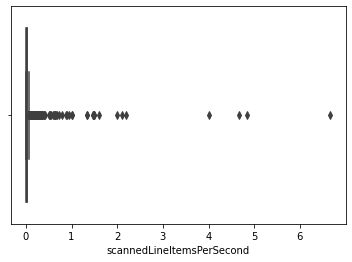

In [12]:
# Closer look on scannedLineItemsPerSecond
sns.boxplot(dataset.scannedLineItemsPerSecond)

In [13]:
# look at extreme outliers of scannedLineItemsPerSecond
dataset_lineItemsPerSecond = dataset[dataset['scannedLineItemsPerSecond'] >= 4]
dataset_lineItemsPerSecond

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
173,6,2,75.74,6,1,1,4.000000,37.870000,0.750000,0
1103,5,6,84.32,10,6,2,4.833333,14.053333,0.344828,0
1423,6,3,7.68,2,3,0,6.666667,2.560000,0.100000,0
1835,3,3,64.94,3,4,3,4.666667,21.646667,0.214286,0


/Users/Dominik/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


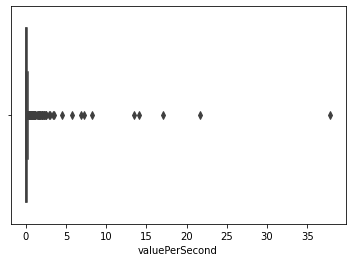

In [14]:
# Closer look on valuePerSecond
sns.boxplot(dataset.valuePerSecond)

In [55]:
# look at extreme outliers of valuePerSecond
dataset_valuePerSecond = dataset[dataset['valuePerSecond'] > 10]
dataset_valuePerSecond

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
173,6,2,75.74,6,1,1,4.000000,37.870000,0.750000,0
1103,5,6,84.32,10,6,2,4.833333,14.053333,0.344828,0
1154,5,4,53.65,11,5,4,1.500000,13.412500,1.833333,0
1715,1,2,34.07,5,9,4,0.500000,17.035000,5.000000,0
1835,3,3,64.94,3,4,3,4.666667,21.646667,0.214286,0


/Users/Dominik/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


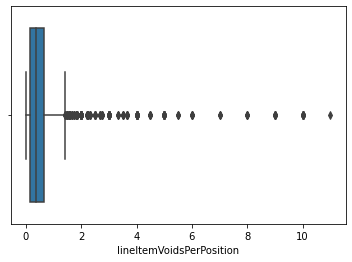

In [15]:
# closer look on lineItemVoidsPerPosition
sns.boxplot(dataset.lineItemVoidsPerPosition)

In [57]:
dataset_lineItemVoidsPerPosition = dataset[dataset['lineItemVoidsPerPosition'] > 6]
dataset_lineItemVoidsPerPosition

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
127,5,690,58.35,8,7,3,0.001449,0.084565,8.0,0
171,4,1235,40.55,9,2,5,0.000810,0.032834,9.0,0
210,6,1603,47.86,9,9,3,0.000624,0.029857,9.0,0
360,2,1659,54.70,7,9,4,0.000603,0.032972,7.0,0
362,3,1374,51.79,9,0,4,0.000728,0.037693,9.0,0
540,4,1412,47.42,10,1,5,0.000708,0.033584,10.0,0
565,6,191,8.55,9,4,2,0.005236,0.044764,9.0,0
731,4,160,89.67,8,5,2,0.006250,0.560438,8.0,0
776,2,1656,87.74,8,4,1,0.000604,0.052983,8.0,0
792,5,563,21.35,10,10,5,0.001776,0.037922,10.0,0
